__Part-B__

## Customer Segmentation

___Customer Segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.___

In [1]:
# Insights from customer segmentation are used to develop tailor-made 
# marketing campaigns and for designing overall marketing strategy and planning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("OnlineRetail.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [4]:
df.shape

(499428, 8)

In [5]:
print("Total No of Rows",df.shape[0])
print("Total No of Columns",df.shape[1])

Total No of Rows 499428
Total No of Columns 8


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    499428 non-null  object 
 1   StockCode    499428 non-null  object 
 2   Description  498099 non-null  object 
 3   Quantity     499428 non-null  int64  
 4   InvoiceDate  499428 non-null  object 
 5   UnitPrice    499428 non-null  float64
 6   CustomerID   379979 non-null  float64
 7   Country      499428 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [10]:
df.Country.value_counts().sort_values(ascending=False).head()

United Kingdom    455353
Germany             8930
France              8118
EIRE                7793
Spain               2458
Name: Country, dtype: int64

In [11]:
# Customer distribution by country

ctry_cust_data = df[['Country','CustomerID']].drop_duplicates()
ctry_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3835
14,Germany,93
13,France,84
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,18
19,Italy,13
12,Finland,12
24,Norway,10


In [12]:
# Keep only United Kingdom data

df = df.query("Country=='United Kingdom'").reset_index(drop=True)

In [13]:
# Checking for missing values in dataset

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1329
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     118011
Country             0
dtype: int64

In [14]:
df = df[pd.notnull(df['CustomerID'])]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
# Removing missing values in CustomerId column can ignore missing values in Description Column

In [16]:
# Validating if there are any negative values in Quantity and UnitPrice Columns

df.Quantity.min()

-80995

In [17]:
df.UnitPrice.min()

0.0

In [18]:
# Filtering out Records with negative values

df = df[(df['Quantity']>0)]

In [19]:
df.Quantity.min()

1

In [20]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [21]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [22]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [23]:
df['TotalAmount']= df['UnitPrice']*df['Quantity']

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


In [25]:
df.shape

(330402, 9)

## RFM

In [26]:
from datetime import timedelta

In [27]:
recent_date = df['InvoiceDate'].max()+timedelta(days=1)
recent_date

Timestamp('2011-12-10 12:49:00')

In [28]:
retail_RFM = df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(df['InvoiceDate'].max().date()-x.max().date()).days})
retail_RFM 

,InvoiceDate
CustomerID,
12346.0,325
12747.0,2
12748.0,0
12749.0,3
12820.0,3
...,...
18280.0,277
18281.0,180
18282.0,7


In [29]:
df.groupby('CustomerID').agg({'InvoiceNo':'count'})

,InvoiceNo
CustomerID,
12346.0,1
12747.0,88
12748.0,3928
12749.0,199
12820.0,59
...,...
18280.0,10
18281.0,7
18282.0,12


In [30]:
df= df.rename(columns={'TotalAmount':'Revenue'})
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


In [31]:
df.groupby('CustomerID').agg({'Revenue':'sum'})

,Revenue
CustomerID,
12346.0,77183.60
12747.0,3489.74
12748.0,29491.60
12749.0,4090.88
12820.0,942.34
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [32]:
RFM = df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(df['InvoiceDate'].max().date()-x.max().date()).days,'InvoiceNo':'count','Revenue':'sum'})
RFM 

,InvoiceDate,InvoiceNo,Revenue
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,88,3489.74
12748.0,0,3928,29491.60
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [33]:
RFM.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'Revenue':'Monetary' },inplace= True)

In [34]:
r_labels = range(4,0,-1); f_labels = range(1,5);
m_labels = range(1,5)

In [35]:
RFM['r_quartile'] = pd.qcut(RFM['Recency'],q = 4 ,labels= r_labels)
RFM['f_quartile'] = pd.qcut(RFM['Frequency'],q = 4 , labels=f_labels,duplicates = 'drop')
RFM['m_quartile'] = pd.qcut(RFM['Monetary'], q = 4 ,labels= m_labels)

In [36]:
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,88,3489.74,4,3,4
12748.0,0,3928,29491.60,4,4,4
12749.0,3,199,4090.88,4,4,4
12820.0,3,59,942.34,4,3,3


In [37]:
RFM['RFM_Score'] = RFM.r_quartile.astype(str)+ RFM.f_quartile.astype(str) + RFM.m_quartile.astype(str)
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,88,3489.74,4,3,4,434
12748.0,0,3928,29491.60,4,4,4,444
12749.0,3,199,4090.88,4,4,4,444
12820.0,3,59,942.34,4,3,3,433


In [38]:
RFM['RFM_score']= RFM[['r_quartile','f_quartile','m_quartile']].sum(axis=1)

In [39]:
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6
12747.0,2,88,3489.74,4,3,4,434,11
12748.0,0,3928,29491.60,4,4,4,444,12
12749.0,3,199,4090.88,4,4,4,444,12
12820.0,3,59,942.34,4,3,3,433,10


In [40]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3814 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Recency     3814 non-null   int64   
 1   Frequency   3814 non-null   int64   
 2   Monetary    3814 non-null   float64 
 3   r_quartile  3814 non-null   category
 4   f_quartile  3814 non-null   category
 5   m_quartile  3814 non-null   category
 6   RFM_Score   3814 non-null   object  
 7   RFM_score   3814 non-null   int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 190.3+ KB


In [41]:
def rfm_category(df):
    if df['RFM_score']>=9:
        return 'Best Customer'
    elif((df['RFM_score']>=7) and (df['RFM_score']<9)):
        return 'High Customer'
    elif((df['RFM_score']>=5) and (df['RFM_score']<7)):
        return 'Loyal Customer'
    elif((df['RFM_score']>=6) and (df['RFM_score']<7)):
        return 'Potential Customer'
    elif((df['RFM_score']>=4) and (df['RFM_score']<6)):
        return ' Medium Customer'
    
    else:
        return 'Least Customer'

In [42]:
RFM['RFM_level'] = RFM.apply( rfm_category , axis =1)

In [43]:
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_score,RFM_level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,Loyal Customer
12747.0,2,88,3489.74,4,3,4,434,11,Best Customer
12748.0,0,3928,29491.60,4,4,4,444,12,Best Customer
12749.0,3,199,4090.88,4,4,4,444,12,Best Customer
12820.0,3,59,942.34,4,3,3,433,10,Best Customer


## K-means Clustering Using RFM

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [45]:
x = RFM[['Recency','Frequency','Monetary']]
scaler = MinMaxScaler()

In [46]:
RFM_scaled = scaler.fit_transform(x)

In [47]:
RFM_scaled = pd.DataFrame(RFM_scaled)
RFM_scaled.columns = ['Recency','Frequency','Monetary']
RFM_scaled.head()

,Recency,Frequency,Monetary
0,0.958702,0.000000,0.332942
1,0.005900,0.011509,0.015053
2,0.000000,0.519513,0.127216
3,0.008850,0.026194,0.017647
4,0.008850,0.007673,0.004065


In [48]:
cls = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(RFM_scaled)
    cls.append(kmeans.inertia_)
print(cls)

[60.355850231688564, 33.071173847036704, 20.027669922405373, 15.466815793898169, 12.800618215330578, 10.420240506545259, 8.490443400410465, 7.206522653330319, 6.081935003413167]


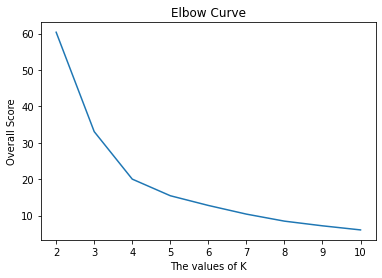

In [49]:
plt.plot(range(2,11),cls)
plt.xlabel("The values of K")
plt.ylabel("Overall Score")
plt.title("Elbow Curve")
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(RFM_scaled)
lbs =kmeans.labels_
print(kmeans.labels_)

[0 1 1 ... 1 1 1]


In [51]:
RFM['Cluster- No']= lbs
RFM.head(10)

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_score,RFM_level,Cluster- No
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,Loyal Customer,0
12747.0,2,88,3489.74,4,3,4,434,11,Best Customer,1
12748.0,0,3928,29491.60,4,4,4,444,12,Best Customer,1
12749.0,3,199,4090.88,4,4,4,444,12,Best Customer,1
12820.0,3,59,942.34,4,3,3,433,10,Best Customer,1
12821.0,214,6,92.72,1,1,1,111,3,Least Customer,0
12822.0,70,46,948.88,2,3,3,233,8,High Customer,1
12823.0,74,5,1759.50,2,1,4,214,7,High Customer,1
12824.0,59,25,397.12,2,2,2,222,6,Loyal Customer,1


In [52]:
RFM.describe()

,Recency,Frequency,Monetary,RFM_score,Cluster- No
count,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000
mean,84.038542,86.628736,1785.456136,7.505768,1.043262
std,89.547531,208.735774,7128.356551,2.809792,0.577546
min,0.000000,1.000000,0.000000,3.000000,0.000000
25%,17.000000,16.000000,292.402500,5.000000,1.000000
50%,47.000000,40.000000,637.005000,7.000000,1.000000
75%,128.000000,96.000000,1537.840000,10.000000,1.000000
max,339.000000,7560.000000,231822.690000,12.000000,2.000000


<AxesSubplot:xlabel='Cluster- No', ylabel='Recency'>

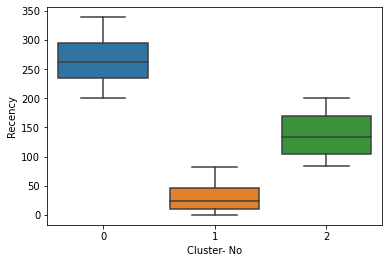

In [53]:
sns.boxplot(x='Cluster- No', y='Recency', data = RFM)

<AxesSubplot:xlabel='Cluster- No', ylabel='Frequency'>

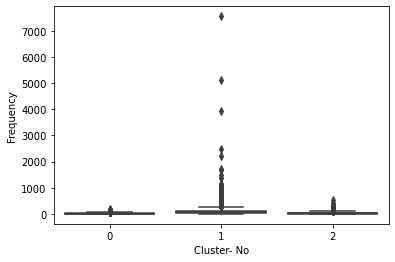

In [54]:
sns.boxplot(x='Cluster- No', y='Frequency', data = RFM)

In [55]:
# Conclusion -

# In the Elbow Plot We can see that the Cluster 3 had been performed better after calculating Overall Score